# Problem Statement

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/data.csv')

In [7]:
df

,name,street_address,city,postcode,phone_number,job,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,score
0,Shane Davis,650 Reyes Square,New Brad,9930,486.414.3551x5061,Financial trader,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0,0.678715
1,Thomas Fuentes,15482 Anderson Square,Lake Linda,59437,489-096-2389x743,Chiropractor,6,329.08,1,1,Rural,1,Web,No Offer,0,0.961538
2,Sarah Tucker,0709 Maria Drive,New Melissaside,63241,(832)022-5573x275,"Programmer, multimedia",7,180.65,0,1,Surburban,1,Web,Buy One Get One,0,0.205998
3,Greg Nguyen,330 Jason Square,Kendraville,73418,557-122-4652x76680,Youth worker,9,675.83,1,0,Rural,1,Web,Discount,0,1.216920
4,Mrs. Amy Gray,1384 Hall Manor Suite 170,Stevensland,51007,001-623-997-5852x71616,Land/geomatics surveyor,2,45.34,1,0,Urban,0,Web,Buy One Get One,0,1.389221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,Daniel Robles,42981 Bass Locks,Turnerfurt,28905,001-122-661-3301x366,Ambulance person,10,105.54,1,0,Urban,0,Web,Discount,0,1.011057
63996,Amanda Brown,58179 Jennifer Circles,Whitetown,38896,482-237-2940x236,Careers adviser,5,38.91,0,1,Urban,1,Phone,Discount,0,0.884910
63997,Michelle Frost,6009 Ford Island,Port Leonard,43293,001-950-520-9754,Music therapist,6,29.99,1,0,Urban,1,Phone,Discount,0,1.601580
63998,Lisa Avila,89102 Strickland Ports Apt. 911,Lynchborough,20440,+1-026-067-9202x1069,Dancer,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0,1.245146


In [8]:
df = df[['recency', 'history', 'used_discount', 'used_bogo', 'is_referral', 'channel', 'offer', 'conversion', 'score']]

In [9]:
df

,recency,history,used_discount,used_bogo,is_referral,channel,offer,conversion,score
0,10,142.44,1,0,0,Phone,Buy One Get One,0,0.678715
1,6,329.08,1,1,1,Web,No Offer,0,0.961538
2,7,180.65,0,1,1,Web,Buy One Get One,0,0.205998
3,9,675.83,1,0,1,Web,Discount,0,1.216920
4,2,45.34,1,0,0,Web,Buy One Get One,0,1.389221
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,0,Web,Discount,0,1.011057
63996,5,38.91,0,1,1,Phone,Discount,0,0.884910
63997,6,29.99,1,0,1,Phone,Discount,0,1.601580
63998,1,552.94,1,0,1,Multichannel,Buy One Get One,0,1.245146


In [10]:
#put some visualizations here

In [11]:
def split_data(df, target_name, test_size):
    
    y = df[target_name]
    X = df.drop(target_name, axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=test_size)
    
    return X_train, X_test, y_train, y_test

In [12]:
numeric_features = list(df.select_dtypes(include=['int', 'float']).columns)
categorical_features = list(df.select_dtypes(exclude=['int', 'float']).columns)

In [13]:
#numeric_features.remove('conversion')

In [14]:
X_train, X_test, y_train, y_test = split_data(df[numeric_features], 'conversion', 0.2)

In [15]:
clf = LogisticRegression(C=5, class_weight='auto', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False).fit(X_train, y_train)

In [16]:
y_pred = clf.predict(X_test)

In [17]:
print('Model Accuracy: ')
accuracy_score(y_test, y_pred)

Model Accuracy: 


0.935625

### We achieved 93% Accuracy on our first try! 

### But are we sure this is a good result?

In [18]:
cm = confusion_matrix(y_test, y_pred)

In [19]:
def plot_conf_matrix(cmx):
    cmap = mpl.colors.ListedColormap(['green'])
    cmap1 = mpl.colors.ListedColormap(['red'])
    mask1 = (cmx.isin([cmx.iloc[0,0],cmx.iloc[1,1]]))
    
    f, ax = plt.subplots(figsize = (5,3))
    sns.heatmap(cmx, annot=True, fmt = 'g', cmap = cmap,
            cbar = False, annot_kws={"size": 20},
            ax=ax)
    sns.heatmap(cmx, mask=mask1 , cmap=cmap1, cbar=False)

    ax.set_ylabel('Predicted label', fontsize = 15)
    ax.set_xlabel('True label', fontsize = 15)
    ax.set_title("Confusion Matrix", fontsize = 20)
    plt.show()

### We correctly predicted 1345 actual conversion
### But we incorrectly ignored 534 people who would have accepted our offer

In [23]:
cm.T

array([[10631,   534],
       [  290,  1345]])

In [24]:
cm_inverted = cm.T

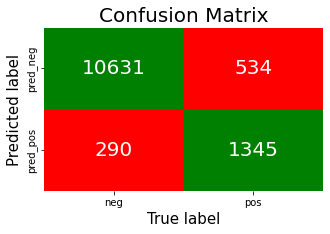

In [25]:
plot_conf_matrix(pd.DataFrame(cm_inverted, columns=['neg', 'pos'], 
                       index=['pred_neg', 'pred_pos']))

### We want a model that is better at guessing i.e. higher values in the green boxes

In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#### TN - True Negative - Predicted Negative, Actually Negative - Correct Guess - Top Left Box

In [27]:
print('Number of True Negatives: ', tn)

Number of True Negatives:  10631


#### FP - False Positive - Predicted Positive, Actually Negative - Bottom Left Box

In [28]:
print('Number of False Positives: ', fp)

Number of False Positives:  290


#### FN - False Negative - Predicted Negative, Actually Positive - Top Right Box

In [29]:
print('Number of False Negatives: ', fn)

Number of False Negatives:  534


#### TP - True Positive - Predicted Positive, Actually Positive - Bottom Right Box

In [30]:
print('Number of True Positives: ', tp)

Number of True Positives:  1345


/home/cdsw/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
